In [90]:
getwd()
old_data <- read.csv("C:/Users/31650/Desktop/final/bat.csv", header = FALSE)
qtr <- as.numeric(as.character(old_data[2:53,1]))
acc <- as.numeric(as.character(old_data[2:53,2]))
fuel <- as.numeric(as.character(old_data[2:53,3]))
rate <- acc/fuel

data = data.frame(qtr=qtr, acc=acc, fuel=fuel, rate=rate)
head(data)


[1] "C:/Users/31650/Desktop"

,qtr,acc,fuel,rate
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,192,32.592,5.891016
2,2,238,37.250,6.389262
3,3,232,40.032,5.795364
4,4,246,35.852,6.861542
5,5,185,38.226,4.839638
6,6,274,38.711,7.078091


In [27]:
install.packages('TTR')

Installing package into 'C:/Users/31650/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependency 'zoo'




package 'zoo' successfully unpacked and MD5 sums checked
package 'TTR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\31650\AppData\Local\Temp\RtmpI59zij\downloaded_packages


In [28]:
install.packages('zoo')

Installing package into 'C:/Users/31650/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'zoo' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\31650\AppData\Local\Temp\RtmpI59zij\downloaded_packages


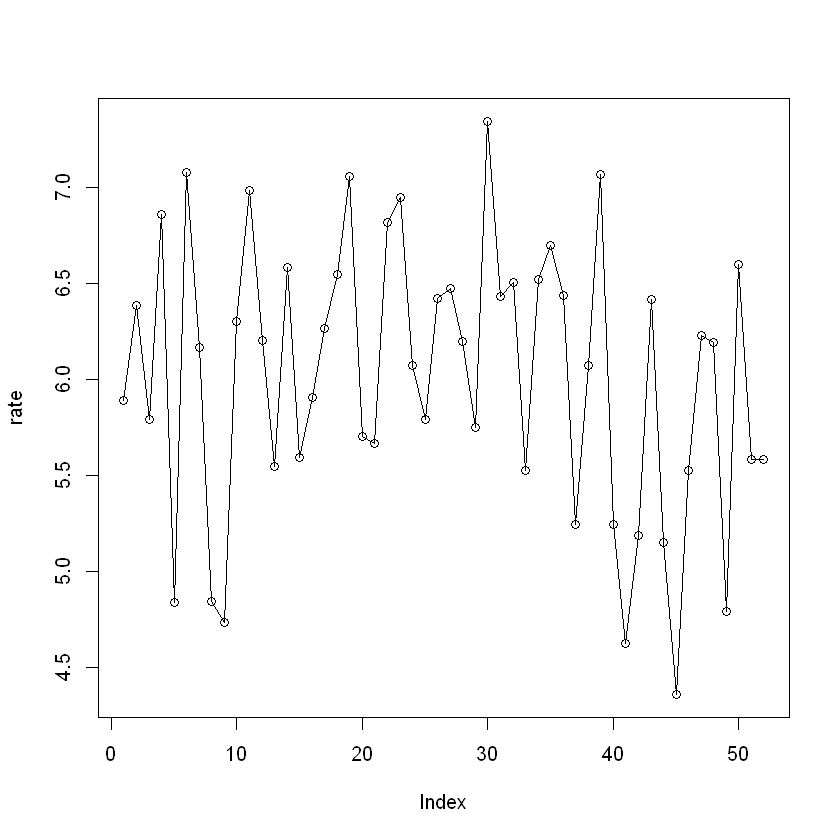

In [91]:
plot(rate, type="o")

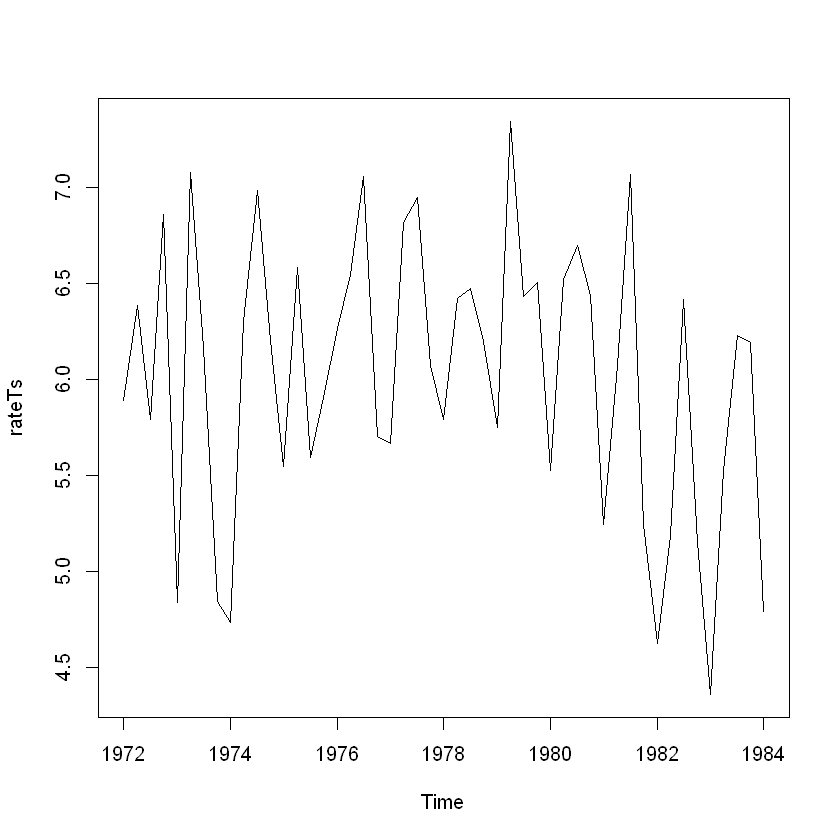

In [87]:
dataTs <- ts(data, frequency=4, start=c(1972),end=c(1984))
rateTs <- ts(rate, frequency=4, start=c(1972),end=c(1984))
plot(rateTs)

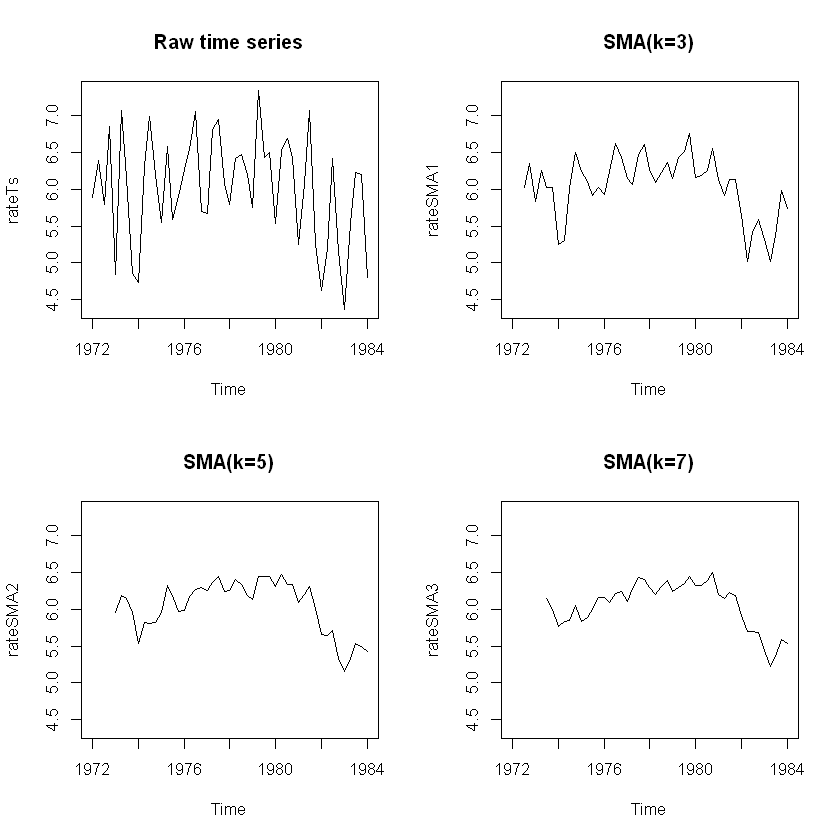

In [77]:
library(TTR)
par(mfrow = c(2,2))
# install.packages("forecast")
ylim <- c(min(rateTs), max(rateTs))
rateSMA1<-SMA(rateTs,3)
rateSMA2<-SMA(rateTs,5)
rateSMA3<-SMA(rateTs,7)
plot(rateTs, main = "Raw time series",type="l")
plot(rateSMA1,main='SMA(k=3)',ylim=ylim,type="l")
plot(rateSMA2,main='SMA(k=5)',ylim=ylim,type="l")
plot(rateSMA3,main='SMA(k=7)',ylim=ylim,type="l")

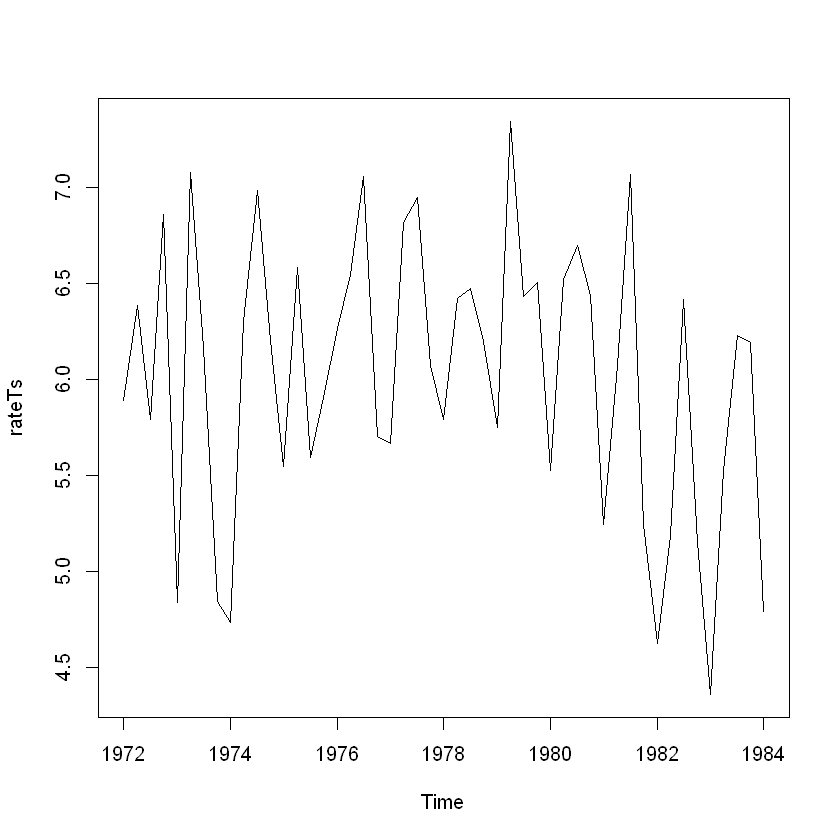

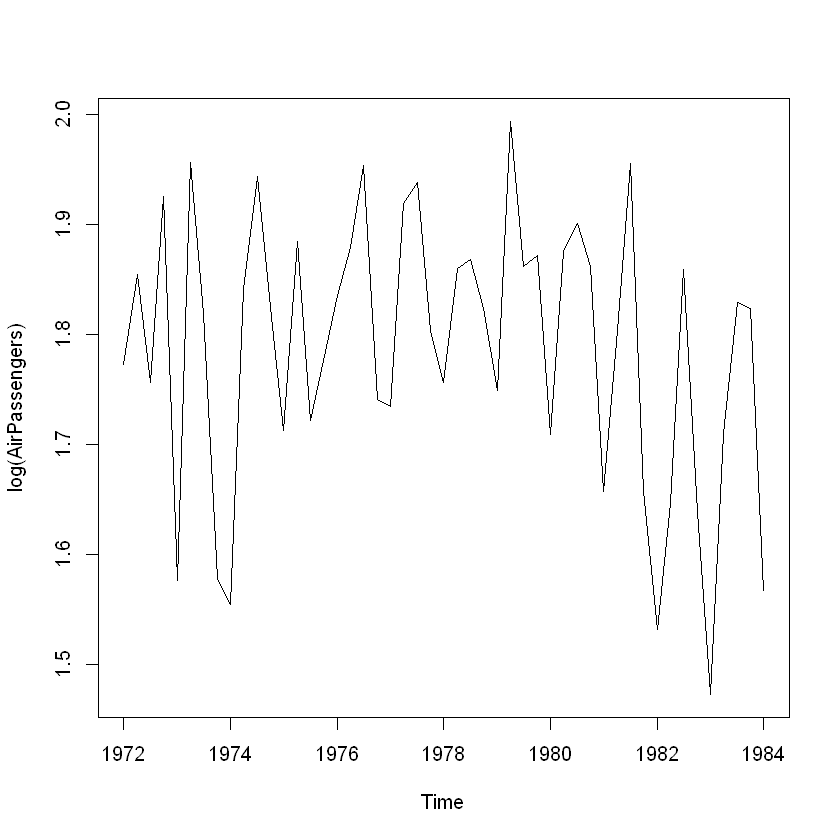

,seasonal,trend,remainder
1972 Q1,-0.128137946,1.843971,0.057595209
1972 Q2,0.059198209,1.824492,-0.029071624
1972 Q3,0.078006578,1.807147,-0.128094861
1972 Q4,-0.009066711,1.792717,0.142281715
1973 Q1,-0.128137946,1.814407,-0.109428670
1973 Q2,0.059198209,1.780856,0.116950371
1973 Q3,0.078006578,1.732487,0.008575736
1973 Q4,-0.009066711,1.701953,-0.114442918
1974 Q1,-0.128137946,1.708113,-0.024858265
1974 Q2,0.059198209,1.763966,0.018243236


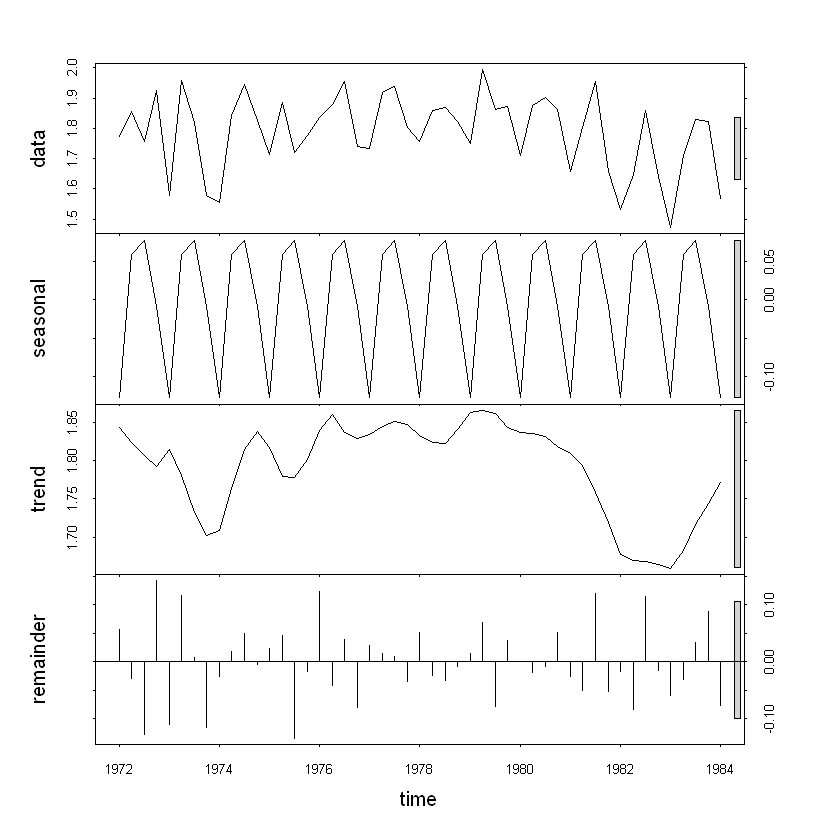

In [79]:
plot(rateTs)
#对数变换
lrateTs <- log(rateTs)
#画出对数变换后的时间序列
plot(lrateTs, ylab="log(AirPassengers)")
#分解时间序列
fit <- stl(lrateTs, s.window="period")
#画出分解序列的结果
plot(fit)
fit$time.series

In [80]:
# # 季节性
# par(mfrow = c(2,2))
# rateDecomponents<-decompose(rateTs)

# plot(rateDecomponents)

# #从原始时间序列中去除去季节部分。

# xtimeseriesseasonallyadjusted<-rateTs-rateDecomponents$seasonal

# # 我们可以使用“plot()”画出季节性修正时间序列，代码如下：

# plot(xtimeseriesseasonallyadjusted)

In [120]:
trainData <- data.frame(data[1:30,4])
head(trainData)
train_set <- ts(trainData, frequency=4, start=c(1972),end=c(1984))
train_set

,data.1.30..4.
,<dbl>
1,5.891016
2,6.389262
3,5.795364
4,6.861542
5,4.839638
6,7.078091


,Qtr1,Qtr2,Qtr3,Qtr4
1972,5.891016,6.389262,5.795364,6.861542
1973,4.839638,7.078091,6.166114,4.847406
1974,4.735640,6.305408,6.984388,6.204099
1975,5.546605,6.584517,5.595360,5.908138
1976,6.267766,6.547631,7.058241,5.704013
1977,5.669738,6.819678,6.949867,6.074709
1978,5.792347,6.424983,6.478059,6.198734
1979,5.752807,7.346064,5.891016,6.389262
1980,5.795364,6.861542,4.839638,7.078091
1981,6.166114,4.847406,4.735640,6.305408


In [121]:
testData <- data.frame(data[30:52,4])
head(testData)
test_set <- ts(testData, frequency=4, start=c(1972),end=c(1984))
test_set

,data.30.52..4.
,<dbl>
1,7.346064
2,6.435741
3,6.505014
4,5.527700
5,6.525082
6,6.697134


,Qtr1,Qtr2,Qtr3,Qtr4
1972,7.346064,6.435741,6.505014,5.527700
1973,6.525082,6.697134,6.438344,5.244566
1974,6.073104,7.069048,5.245698,4.627736
1975,5.188810,6.420966,5.153932,4.361081
1976,5.530096,6.232634,6.196841,4.795563
1977,6.603097,5.585188,5.587127,7.346064
1978,6.435741,6.505014,5.527700,6.525082
1979,6.697134,6.438344,5.244566,6.073104
1980,7.069048,5.245698,4.627736,5.188810
1981,6.420966,5.153932,4.361081,5.530096


Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = train_setLog)

Smoothing parameters:
 alpha: 0.01618769
 beta : 0.3891143
 gamma: 0.5130867

Coefficients:
           [,1]
a  1.6927123940
b  0.0002588038
s1 0.0845141965
s2 0.0577411647
s3 0.1815087578
s4 0.1792672685

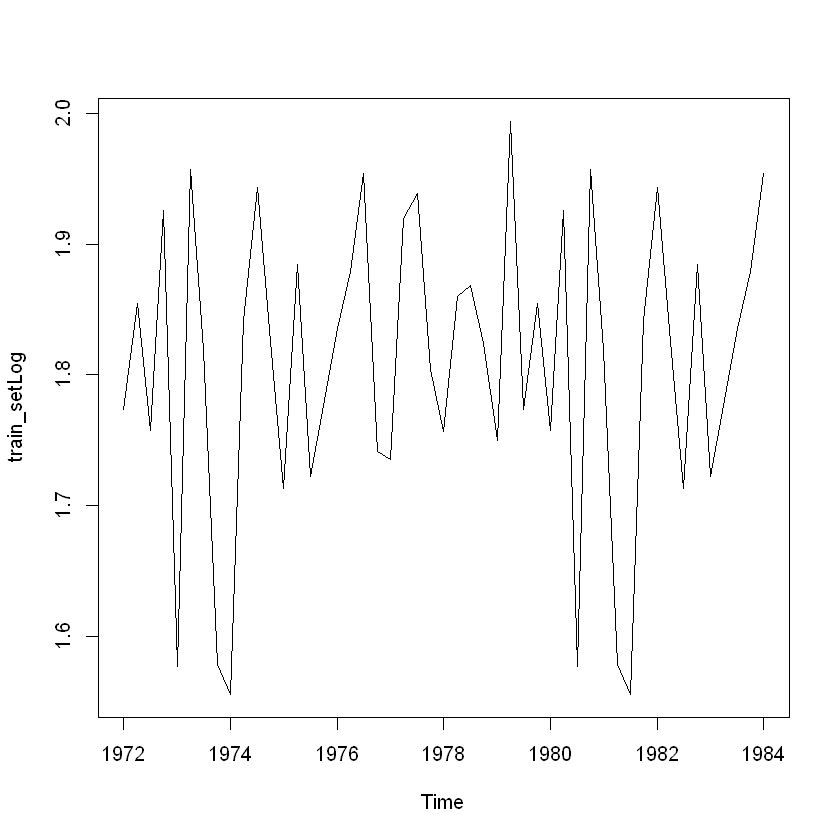

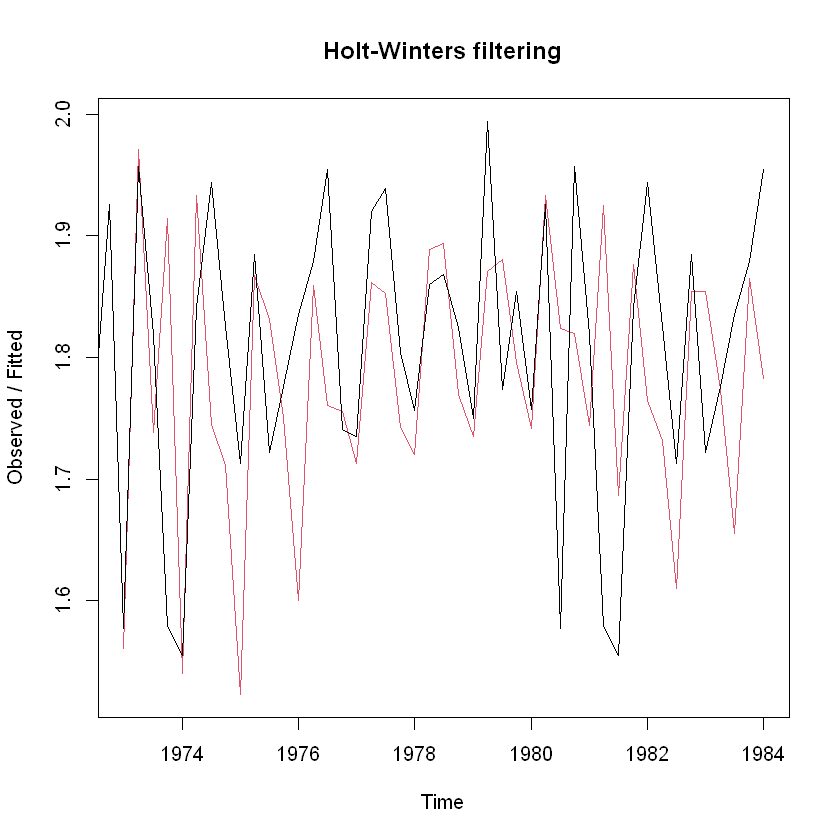

In [122]:
#取对数可以减少极值带来的影响，消除方差不齐。
# logxtimeseries<-log(xtimeseries)
train_setLog <- log(train_set)

HwModel<-HoltWinters(train_setLog)

HwModel

#用黑线画出原始数据的时间曲线图，用红线在上面画出预测值的时间曲线图：
plot(train_setLog)
plot(HwModel)

#如果alpha相对较低，说明当前时间点估计得水平是基于最近观测和历史观测值。beta的估计值是0.00，表明估计出来的趋势部分的斜率在整个时间序列上是不变的，并且应该是等于其初始值。这是很直观的感觉，水平改变非常多，但是趋势部分的斜率b却仍然是大致相同的。与此相反的，gamma的值（0.96）则很高，表明当前时间点的季节性部分的估计仅仅基于最近的观测值。


In [125]:
install.packages('forecast')


Warning message:
"package 'forecast' is in use and will not be installed"


In [126]:
library(forecast)

In [131]:
library(forecast)
predict <- forecast.HoltWinters(HwModel)

plot(predict)


ERROR: Error in forecast.HoltWinters(HwModel): could not find function "forecast.HoltWinters"
